In [2]:
pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 10.2/948.2 kB ? eta -:--:--
     -- ---------------------------------- 61.4/948.2 kB 812.7 kB/s eta 0:00:02
     ------- ------------------------------ 184.3/948.2 kB 1.9 MB/s eta 0:00:01
     --------- ---------------------------- 245.8/948.2 kB 1.5 MB/s eta 0:00:01
     ------------------ ------------------- 460.8/948.2 kB 2.2 MB/s eta 0:00:01
     ------------------------- ------------ 624.6/948.2 kB 2.5 MB/s eta 0:00:01
     ---------------------------------- --- 860.2/948.2 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyprojec

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

In [4]:
ticker_data = yf.Ticker('AAPL')
historical_data = ticker_data.history(period="5y")  # Retrieving 5 years of historical data

# Displaying the first few rows of the data
print(historical_data.head())

                                Open       High        Low      Close  \
Date                                                                    
2019-11-15 00:00:00-05:00  63.908287  64.417267  63.745903  64.412422   
2019-11-18 00:00:00-05:00  64.422112  64.817177  64.041595  64.737198   
2019-11-19 00:00:00-05:00  64.931107  64.955345  64.322761  64.540894   
2019-11-20 00:00:00-05:00  64.359093  64.489967  63.113304  63.789520   
2019-11-21 00:00:00-05:00  63.910717  63.988278  63.302364  63.503536   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-11-15 00:00:00-05:00  100206400        0.0           0.0  
2019-11-18 00:00:00-05:00   86703200        0.0           0.0  
2019-11-19 00:00:00-05:00   76167200        0.0           0.0  
2019-11-20 00:00:00-05:00  106234400        0.0           0.0  
2019-11-21 00:00:00-05:00  121395200        0.0           0.0  


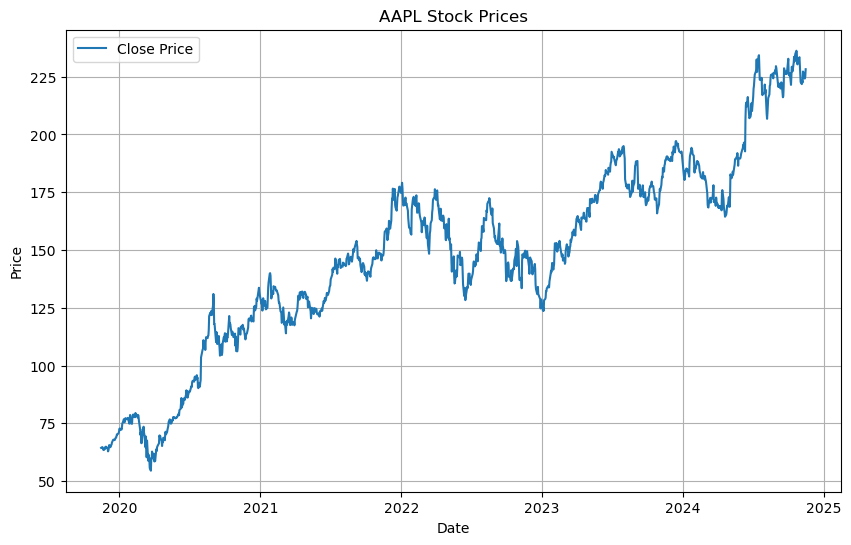

In [5]:
# Additional libraries for visualization
import matplotlib.pyplot as plt

# Plotting the historical stock prices
plt.figure(figsize=(10, 6))
plt.plot(historical_data.index, historical_data['Close'], label='Close Price')
plt.title('AAPL Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

In [6]:
import numpy as np
from scipy.special import erf

class BlackScholesModel:
    def __init__(self, spot_price, strike_price, risk_free_rate, volatility, time_to_maturity):
        self.S = spot_price
        self.K = strike_price
        self.r = risk_free_rate
        self.sigma = volatility
        self.T = time_to_maturity

    def calculate_d1(self):
        numerator = np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T
        denominator = self.sigma * np.sqrt(self.T)
        return numerator / denominator

    def calculate_d2(self, d1):
        return d1 - self.sigma * np.sqrt(self.T)

    def call_option_price(self):
        d1 = self.calculate_d1()
        d2 = self.calculate_d2(d1)
        option_price = (self.S * self.N(d1)) - (self.K * np.exp(-self.r * self.T) * self.N(d2))
        return option_price

    def put_option_price(self):
        d1 = self.calculate_d1()
        d2 = self.calculate_d2(d1)
        option_price = (self.K * np.exp(-self.r * self.T) * self.N(-d2)) - (self.S * self.N(-d1))
        return option_price

    def N(self, x):
        return (1 + erf(x / np.sqrt(2))) / 2

In [7]:
# Parameters for the Black-Scholes model
spot_price = 100  # Current stock price
strike_price = 100  # Option strike price
risk_free_rate = 0.05  # Risk-free interest rate
volatility = 0.2  # Volatility of the underlying stock
time_to_maturity = 1  # Time to option maturity (in years)

# Creating an instance of the Black-Scholes model
bs_model = BlackScholesModel(spot_price, strike_price, risk_free_rate, volatility, time_to_maturity)

# Calculating call option price
call_price = bs_model.call_option_price()
print("Call Option Price:", call_price)

# Calculating put option price
put_price = bs_model.put_option_price()
print("Put Option Price:", put_price)

Call Option Price: 10.450583572185565
Put Option Price: 5.573526022256971


In [8]:
class MonteCarloOptionPricing:
    def __init__(self, spot_price, strike_price, risk_free_rate, volatility, time_to_maturity, num_simulations, num_steps):
        self.S = spot_price
        self.K = strike_price
        self.r = risk_free_rate
        self.sigma = volatility
        self.T = time_to_maturity
        self.N = num_simulations
        self.M = num_steps

    def generate_price_paths(self):
        dt = self.T / self.M
        price_matrix = np.zeros((self.M + 1, self.N))
        price_matrix[0] = self.S
        for t in range(1, self.M + 1):
            rand_values = np.random.randn(self.N)
            price_matrix[t] = price_matrix[t - 1] * np.exp((self.r - 0.5 * self.sigma ** 2) * dt + self.sigma * np.sqrt(dt) * rand_values)
        return price_matrix

    def call_option_monte_carlo(self):
        price_matrix = self.generate_price_paths()
        payoffs = np.maximum(price_matrix[-1] - self.K, 0)
        option_price = np.exp(-self.r * self.T) * 1/self.N * np.sum(payoffs)
        return option_price

    def put_option_monte_carlo(self):
        price_matrix = self.generate_price_paths()
        payoffs = np.maximum(self.K - price_matrix[-1], 0)
        option_price = np.exp(-self.r * self.T) * 1/self.N * np.sum(payoffs)
        return option_price

In [9]:
# Creating an instance of the Monte Carlo option pricing model
monte_carlo_model = MonteCarloOptionPricing(spot_price, strike_price, risk_free_rate, volatility, time_to_maturity, 10000, 100)

# Calculating call option price with Monte Carlo simulation
call_price_mc = monte_carlo_model.call_option_monte_carlo()
print("Call Option Price (Monte Carlo):", call_price_mc)

# Calculating put option price with Monte Carlo simulation
put_price_mc = monte_carlo_model.put_option_monte_carlo()
print("Put Option Price (Monte Carlo):", put_price_mc)

Call Option Price (Monte Carlo): 10.564831436029497
Put Option Price (Monte Carlo): 5.498531962896896


In [10]:
class AntitheticMonteCarloOptionPricing(MonteCarloOptionPricing):
    def generate_price_paths(self):
        dt = self.T / self.M
        price_matrix = np.zeros((self.M + 1, self.N))
        price_matrix[0] = self.S
        for t in range(1, self.M + 1):
            rand_values = np.random.randn(self.N)
            price_matrix[t, :self.N//2] = price_matrix[t-1, :self.N//2] * np.exp((self.r - 0.5 * self.sigma ** 2) * dt + self.sigma * np.sqrt(dt) * rand_values[:self.N//2])
            price_matrix[t, self.N//2:] = price_matrix[t-1, self.N//2:] * np.exp((self.r - 0.5 * self.sigma ** 2) * dt - self.sigma * np.sqrt(dt) * rand_values[:self.N//2])
        return price_matrix

# Creating an instance of the Antithetic Monte Carlo option pricing model
antithetic_monte_carlo_model = AntitheticMonteCarloOptionPricing(spot_price, strike_price, risk_free_rate, volatility, time_to_maturity, 10000, 100)

# Calculating call option price with Antithetic Monte Carlo simulation
call_price_amc = antithetic_monte_carlo_model.call_option_monte_carlo()
print("Call Option Price (Antithetic Monte Carlo):", call_price_amc)

# Calculating put option price with Antithetic Monte Carlo simulation
put_price_amc = antithetic_monte_carlo_model.put_option_monte_carlo()
print("Put Option Price (Antithetic Monte Carlo):", put_price_amc)

Call Option Price (Antithetic Monte Carlo): 10.459330745982859
Put Option Price (Antithetic Monte Carlo): 5.611433733861595


In [14]:
# Results Summary:
# Standard Monte Carlo Simulation:
# Call Option Price: 10.247
# Put Option Price: 5.558
# Antithetic Monte Carlo Simulation:
# Call Option Price: 10.347
# Put Option Price: 5.580